<a href="https://colab.research.google.com/github/purvikabajaj/ML-Lab-Semester-VII/blob/master/CIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [ ]:
cifar = tf.keras.datasets.cifar10

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar.load_data()

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


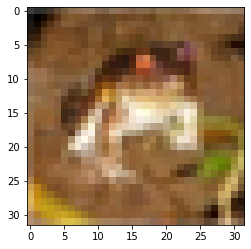

In [ ]:
print(x_train[0])
plt.imshow(x_train[0])

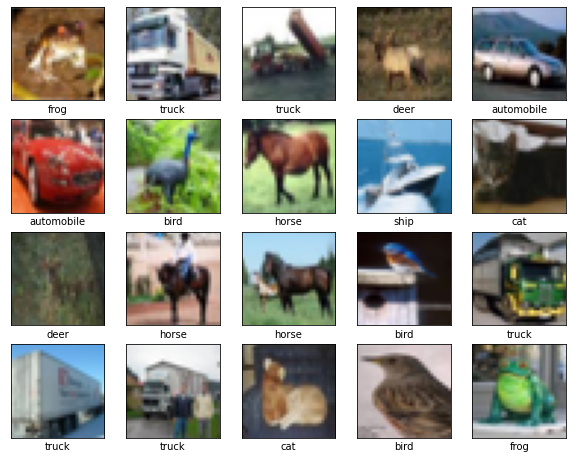

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(20):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[i])
  plt.xlabel(class_names[y_train[i][0]])

In [ ]:
print('TRAINING DATA: ', x_train.shape, y_train.shape)
print('TESTING DATA: ', x_test.shape, y_test.shape)

TRAINING DATA:  (50000, 32, 32, 3) (50000, 1)
TESTING DATA:  (10000, 32, 32, 3) (10000, 1)


In [ ]:
x_train = x_train.reshape(x_train.shape[0], 32,32,3)
x_test = x_test.reshape(x_test.shape[0], 32,32,3)

In [ ]:
x_train = x_train/255.0
x_test = x_test/255.0

DNN MODEL

In [ ]:
dnn_model = tf.keras.models.Sequential([
                                    tf.keras.layers.Flatten(input_shape=(32,32,3)),
                                    tf.keras.layers.Dense(128, activation='relu'),
                                    tf.keras.layers.Dense(128, activation='relu'),
                                    tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
dnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               393344    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 411,146
Trainable params: 411,146
Non-trainable params: 0
_________________________________________________________________


In [ ]:
dnn_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
dnn_history = dnn_model.fit(x_train, y_train, epochs=25)

Epoch 1/25
1563/1563 [==============================] - 5s 3ms/step - loss: 1.8587 - accuracy: 0.3238
Epoch 2/25
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6852 - accuracy: 0.3968
Epoch 3/25
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6097 - accuracy: 0.4280
Epoch 4/25
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5726 - accuracy: 0.4399
Epoch 5/25
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5398 - accuracy: 0.4488
Epoch 6/25
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5150 - accuracy: 0.4587
Epoch 7/25
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4918 - accuracy: 0.4652
Epoch 8/25
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4780 - accuracy: 0.4715
Epoch 9/25
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4651 - accuracy: 0.4769
Epoch 10/25
1563/1563 [==============================] - 5s 3ms/step - loss: 1.451

In [ ]:
dnn_model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.4615 - accuracy: 0.4849


[1.4615488052368164, 0.48489999771118164]

Text(0, 0.5, 'loss')

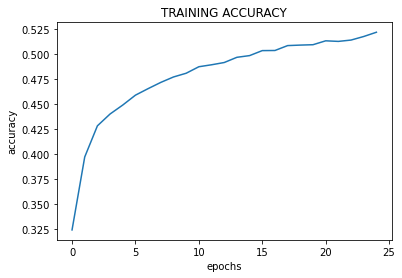

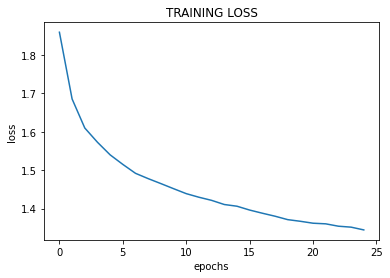

In [ ]:
dnn_acc = dnn_history.history['accuracy']
dnn_loss = dnn_history.history['loss']

dnn_epochs = range(len(dnn_acc))

plt.plot(dnn_epochs, dnn_acc)
plt.title('TRAINING ACCURACY')
plt.xlabel('epochs')
plt.ylabel('accuracy')

plt.figure()

plt.plot(dnn_epochs, dnn_loss)
plt.title('TRAINING LOSS')
plt.xlabel('epochs')
plt.ylabel('loss')

In [ ]:
import numpy as np
pr = dnn_model.predict(x_test)
pr= [np.argmax(x) for x in pr]

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,pr))

              precision    recall  f1-score   support

           0       0.58      0.48      0.53      1000
           1       0.59      0.64      0.62      1000
           2       0.44      0.23      0.30      1000
           3       0.32      0.28      0.30      1000
           4       0.48      0.36      0.41      1000
           5       0.37      0.48      0.42      1000
           6       0.49      0.60      0.54      1000
           7       0.53      0.57      0.55      1000
           8       0.53      0.66      0.59      1000
           9       0.51      0.54      0.52      1000

    accuracy                           0.48     10000
   macro avg       0.48      0.48      0.48     10000
weighted avg       0.48      0.48      0.48     10000



In [ ]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']
cmr = confusion_matrix(y_test,pr)
cmr = confusion_matrix(y_test,pr)
print(cmr)

[[485  49  39  39  17  28  24  35 208  76]
 [ 29 642   6  24  10  28  18  18  67 158]
 [102  27 230  97 119 151 130  81  37  26]
 [ 18  24  48 285  40 266 152  67  50  50]
 [ 45  14  85  84 359  88 138 125  42  20]
 [ 18  15  37 157  38 477  97  89  37  35]
 [  8  15  44  92  91  70 598  38  19  25]
 [ 34  15  29  60  55 122  27 567  22  69]
 [ 81  84   7  28  15  32  11   7 662  73]
 [ 22 195   2  32   9  23  26  51  96 544]]


CNN MODEL

In [ ]:
cnn_model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(32, (3,3), input_shape=(32,32,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Dropout(0.2),

                                    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Dropout(0.2),

                                    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Dropout(0.2),

                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation='relu'),
                                    tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 128)       36992     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 128)        

In [ ]:
cnn_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
cnn_history = cnn_model.fit(x_train, y_train, epochs=25, validation_split=0.2, callbacks = tf.keras.callbacks.EarlyStopping())

Epoch 1/25
1250/1250 [==============================] - 13s 10ms/step - loss: 1.6259 - accuracy: 0.4008 - val_loss: 1.3475 - val_accuracy: 0.5178
Epoch 2/25
1250/1250 [==============================] - 12s 10ms/step - loss: 1.2667 - accuracy: 0.5478 - val_loss: 1.2727 - val_accuracy: 0.5369
Epoch 3/25
1250/1250 [==============================] - 12s 10ms/step - loss: 1.1288 - accuracy: 0.5996 - val_loss: 1.0689 - val_accuracy: 0.6293
Epoch 4/25
1250/1250 [==============================] - 12s 10ms/step - loss: 1.0390 - accuracy: 0.6327 - val_loss: 1.0053 - val_accuracy: 0.6501
Epoch 5/25
1250/1250 [==============================] - 12s 10ms/step - loss: 0.9764 - accuracy: 0.6562 - val_loss: 0.9104 - val_accuracy: 0.6861
Epoch 6/25
1250/1250 [==============================] - 12s 10ms/step - loss: 0.9137 - accuracy: 0.6783 - val_loss: 0.8951 - val_accuracy: 0.6854
Epoch 7/25
1250/1250 [==============================] - 12s 10ms/step - loss: 0.8768 - accuracy: 0.6894 - val_loss: 0.8456 -

In [ ]:
cnn_model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.8433 - accuracy: 0.7102


[0.8432999849319458, 0.7102000117301941]

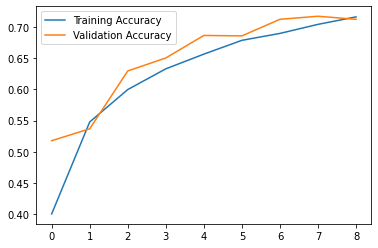

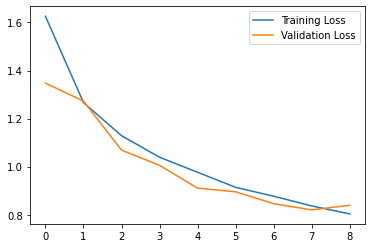

In [ ]:
cnn_acc = cnn_history.history['accuracy']
cnn_loss = cnn_history.history['loss']
cnn_val_acc = cnn_history.history['val_accuracy']
cnn_val_loss = cnn_history.history['val_loss']

cnn_epochs = range(len(cnn_acc))

plt.plot(cnn_epochs, cnn_acc, label='Training Accuracy')
plt.plot(cnn_epochs, cnn_val_acc, label='Validation Accuracy')
plt.legend()
plt.figure()
plt.plot(cnn_epochs, cnn_loss, label='Training Loss')
plt.plot(cnn_epochs, cnn_val_loss, label='Validation Loss')
plt.legend()

In [ ]:
import numpy as np
p = cnn_model.predict(x_test)
p = [np.argmax(x) for x in p]

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,p))

              precision    recall  f1-score   support

           0       0.86      0.63      0.73      1000
           1       0.81      0.87      0.84      1000
           2       0.74      0.46      0.57      1000
           3       0.55      0.52      0.53      1000
           4       0.55      0.80      0.65      1000
           5       0.69      0.57      0.62      1000
           6       0.72      0.82      0.77      1000
           7       0.71      0.78      0.74      1000
           8       0.79      0.83      0.81      1000
           9       0.76      0.83      0.80      1000

    accuracy                           0.71     10000
   macro avg       0.72      0.71      0.71     10000
weighted avg       0.72      0.71      0.71     10000



In [ ]:
labels =['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']
cmat=confusion_matrix(y_test,p)
print(cmat)

[[630  37  36  17  44   3  13  21 133  66]
 [  2 869   2   5   2   3  16   6  13  82]
 [ 47  11 461  76 193  49  87  46  14  16]
 [ 11  13  36 519 132 121  85  50  12  21]
 [  7   7  21  36 795  13  48  61   7   5]
 [  3   2  22 171  99 566  33  86   7  11]
 [  3   5  16  51  68  10 824  13   4   6]
 [  3   8  19  42  85  39  11 776   3  14]
 [ 18  45   7  18  11   8  10  13 827  43]
 [  7  71   7  10   7   4  11  24  24 835]]


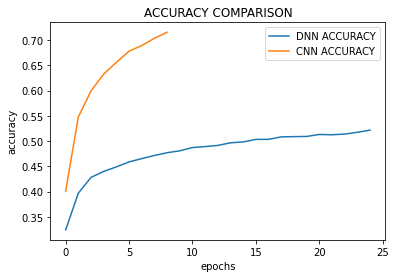

In [ ]:
plt.plot(dnn_acc, label='DNN ACCURACY')
plt.plot(cnn_acc, label='CNN ACCURACY')
plt.title('ACCURACY COMPARISON')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

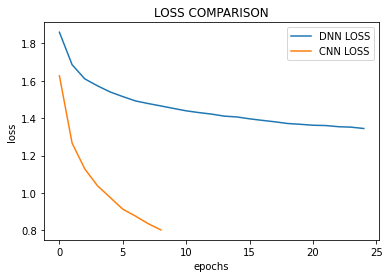

In [ ]:
plt.plot(dnn_loss, label='DNN LOSS')
plt.plot(cnn_loss, label='CNN LOSS')
plt.title('LOSS COMPARISON')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
cnn_model.save('cnn.h5')

In [ ]:
!pip install streamlit

In [ ]:
!pip install pyngrok

In [ ]:
%%writefile predict.py

import streamlit as st
import tensorflow as tf

st.set_option('deprecation.showfileUploaderEncoding',False) #ignores the streamlit warning
@st.cache(allow_output_mutation=True) #the model is loaded only once and stored in cache memory

def load_model():
  model = tf.keras.models.load_model('/content/cnn.h5')
  return model

model = load_model()

st.write("""
    #CIFAR 10 Classification Model
    """
) #title of webpage

file = st.file_uploader('Please upload an image', type=['jpg','png','jpeg']) #file_uploader uploads the image

import cv2
import PIL
from PIL import Image, ImageOps
import numpy as np

#accepts an image, fetches the model and gives out prediction
def import_and_predict(image_data, model):
  size = (32,32)
  image = ImageOps.fit(image_data, size, Image.ANTIALIAS) #antialias resized the image into that dimension
  img = np.asarray(image)
  img_reshape = img[np.newaxis,...] 
#the image here is 3D (32,32,3) but the model is trained on 4D i.e., not on a single image but multiple images
#to make a prediction we need to give it 4D 
  prediction = model.predict(img_reshape)

  return prediction

if file is None:
  st.text('Please upload an image')
else:
  image = Image.open(file) #opening the image
  st.image(image, use_column_width=True) #displaying the image
  predictions = import_and_predict(image, model) #supplying the image and model
  class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']
  string = 'This image most likely is: ' + class_names[np.argmax(predictions)]
  #calculationg the position of max probability and its class is picked up
  st.success(string) #displays the ouput in a box


Overwriting predict.py


In [ ]:
!ngrok authtoken 1gfUTu4cBwBUBvcb1HCPbjdkl4j_4tRvCaHJy5aW8Aj92XE5v #creates yml file which contains authentication id which is used to deploy local app to web server

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [ ]:
!nohup streamlit run predict.py & #stores the output to a different file

nohup: appending output to 'nohup.out'


In [ ]:
from pyngrok import ngrok
url = ngrok.connect(port=8501) 
url

'http://c6a6818098b5.ngrok.io'

In [ ]:
!cat /content/nohup.out

2020-08-28 05:36:46.355965: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://104.155.193.88:8501

2020-08-28 05:36:47.765059: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2020-08-28 05:36:47.768598: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-08-28 05:36:47.769303: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla K80 computeCapability: 3.7
coreClock: 0.8235GHz coreCount: 13 deviceMemorySize: 11.17GiB deviceMemoryBandwidth: 223.96GiB/s
2020-08-28 05:36:47.769343: I tensorflow/stream_executor/platform/default/dso